# BAX 452 Assignment 3
### Group 10: Yi Yin (Ian) Chen/Priyanka Malhotra/Sushma Niveni Pindiga



- Import packages and original data

In [124]:
# Import packages and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv('/Users/ianchen/MSBA/BAX452 Machine Learning/Python/Melbourne_housing.csv')
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Replace spaces in column names
df.columns = df.columns.str.replace(' ','_')

### **1. Data Exploration and Visualization** (15 pts):
- Explore the Melbourne house dataset.

- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

- Include any other plots you find interesting and provide brief interpretations.

In [125]:
# Check the first five row of the data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


In [126]:
# Check column names
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [127]:
# Check the data types
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [128]:
columns = ['Type','Method','SellerG','Regionname','CouncilArea','Postcode','Suburb']
for i in columns:
    print(df[i].value_counts())
    

Type
h    329
u    112
t     58
Name: count, dtype: int64
Method
S     281
SP     73
PI     61
VB     50
SN     22
PN      6
SA      3
SS      2
W       1
Name: count, dtype: int64
SellerG
Jellis           54
Nelson           43
Barry            37
hockingstuart    33
Ray              30
                 ..
Hoskins           1
@Realty           1
RE                1
VICPROP           1
Hall              1
Name: count, Length: 90, dtype: int64
Regionname
Southern Metropolitan         172
Northern Metropolitan         138
Western Metropolitan          103
Eastern Metropolitan           59
South-Eastern Metropolitan     20
Eastern Victoria                4
Northern Victoria               2
Western Victoria                1
Name: count, dtype: int64
CouncilArea
Boroondara City Council           55
Darebin City Council              38
Moonee Valley City Council        33
Melbourne City Council            32
Moreland City Council             28
Brimbank City Council             27
Glen Eira 

In [129]:
# NA summary
na_count = df.isnull().sum()
na_per = round((na_count/len(df))*100)
na_sum = pd.DataFrame({"NA_Count": na_count, "NA_Percentage": na_per, "Type": df.dtypes})
na_sum

,NA_Count,NA_Percentage,Type
Suburb,0,0.0,object
Address,0,0.0,object
Rooms,0,0.0,int64
Type,0,0.0,object
Price,108,22.0,float64
Method,0,0.0,object
SellerG,0,0.0,object
Date,0,0.0,object
Distance,0,0.0,float64
Postcode,0,0.0,int64


In [130]:
# Look into the columns with NAs
na_col = df.isna().any()
df_na = df.loc[:, na_col]
na_sum = pd.DataFrame({"NA_Count": df_na.isnull().sum(), "NA_Percentage": round((df_na.isnull().sum()/len(df_na))*100), "Type": df_na.dtypes, "Median": round(df_na.median(),3),"Mean": round(df_na.mean(),3)})
na_sum

,NA_Count,NA_Percentage,Type,Median,Mean
Price,108,22.0,float64,870500.000,1037079.668
Bedroom2,128,26.0,float64,3.000,3.084
Bathroom,128,26.0,float64,1.000,1.650
Car,137,27.0,float64,2.000,1.738
Landsize,174,35.0,float64,535.000,533.400
BuildingArea,310,62.0,float64,130.000,152.462
YearBuilt,287,58.0,float64,1970.000,1968.118
Lattitude,122,24.0,float64,-37.802,-37.805
Longtitude,122,24.0,float64,144.998,144.998


In [131]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,499.000000,3.910000e+02,499.000000,499.000000,371.000000,371.000000,362.000000,325.000000,189.000000,212.000000,377.000000,377.000000,499.000000
mean,3.028056,1.037080e+06,10.976152,3113.863727,3.083558,1.649596,1.737569,533.400000,152.461905,1968.117925,-37.805206,144.997510,7332.272545
std,0.945935,6.345152e+05,6.441436,111.281137,1.003251,0.785764,1.020658,677.848689,87.227886,35.950470,0.085016,0.113628,4184.540082
min,1.000000,2.100000e+05,1.200000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1879.000000,-38.138600,144.570500,768.000000
25%,2.000000,6.100000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,225.000000,97.000000,1950.000000,-37.853800,144.927300,4380.000000
50%,3.000000,8.705000e+05,10.400000,3101.000000,3.000000,1.000000,2.000000,535.000000,130.000000,1970.000000,-37.802500,144.998000,6543.000000
75%,4.000000,1.262500e+06,13.900000,3152.500000,4.000000,2.000000,2.000000,697.000000,194.000000,2001.000000,-37.750100,145.066200,9540.000000
max,6.000000,5.500000e+06,44.200000,3910.000000,10.000000,6.000000,8.000000,10100.000000,572.000000,2017.000000,-37.407440,145.440820,21650.000000


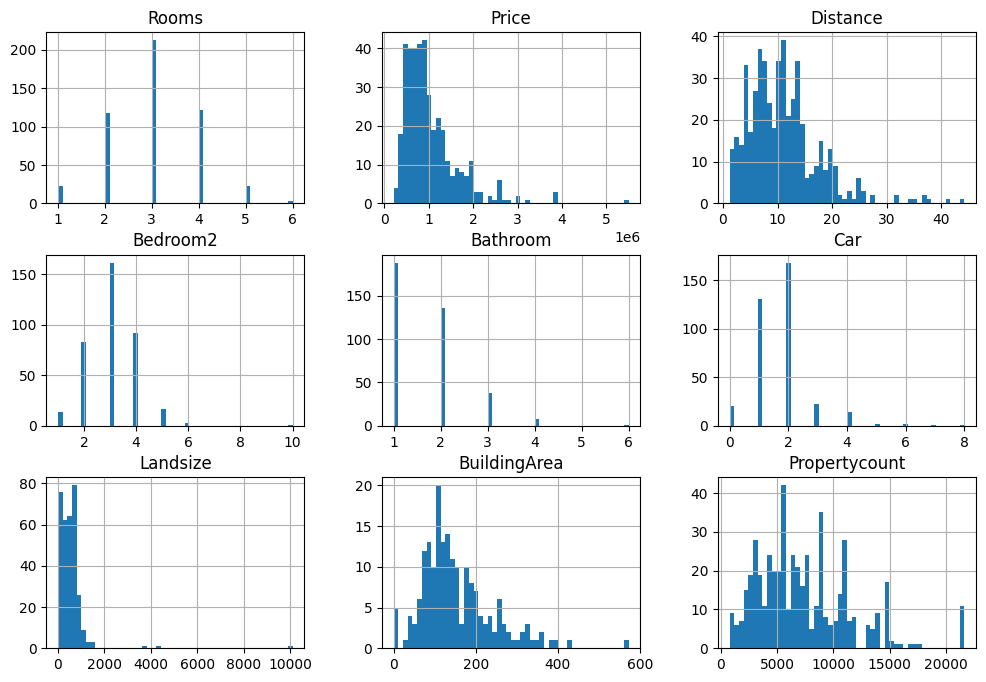

In [132]:
# Histograms
df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Propertycount']].hist(bins=50, figsize=(12, 8))
plt.show()

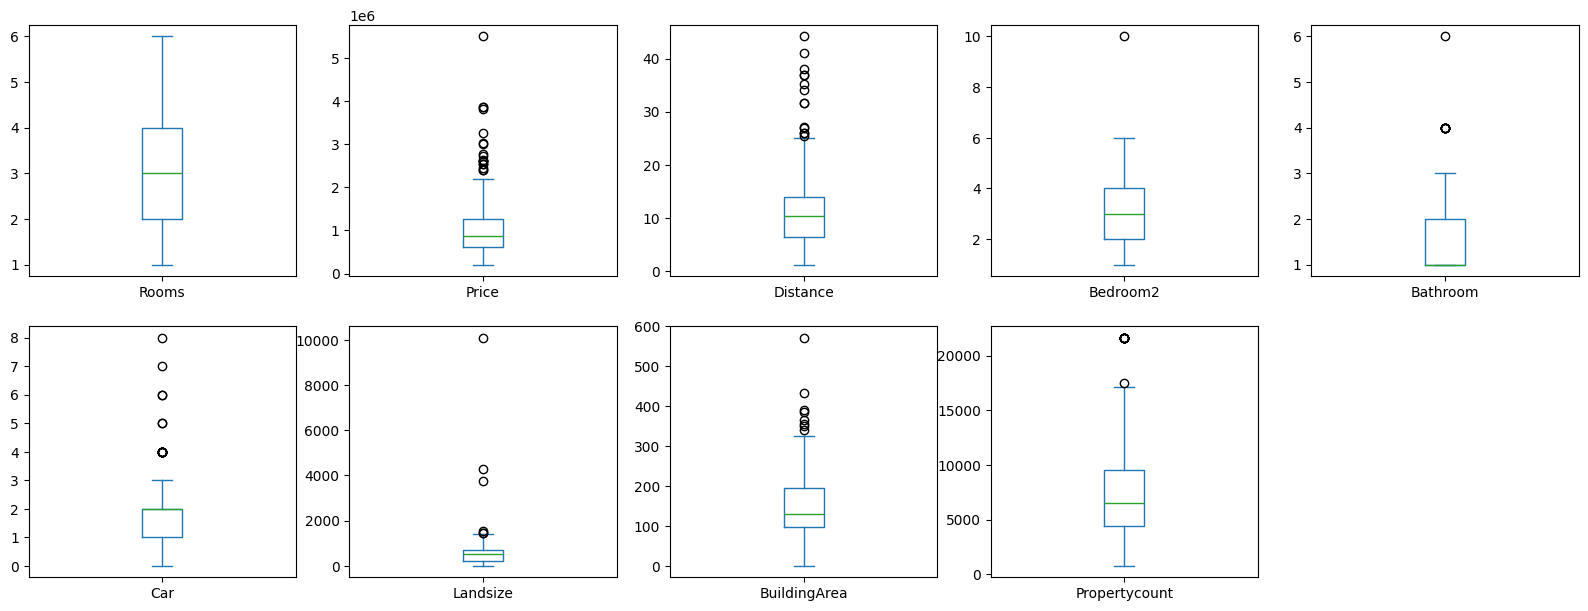

In [133]:
# Box-plot
df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Propertycount']].plot(kind='box', subplots=True, layout=(4,5), figsize=(20, 15))
plt.show()

In [134]:
# Write a function to count outliers
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).sum()

# Count outliers for variables
outliers_counts = df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Propertycount']].apply(outliers)
outliers_counts = pd.DataFrame(outliers_counts)
outliers_counts = outliers_counts.reset_index()
outliers_counts

,index,0
0,Rooms,0
1,Price,18
2,Distance,14
3,Bedroom2,1
4,Bathroom,9
5,Car,20
6,Landsize,6
7,BuildingArea,8
8,Propertycount,12


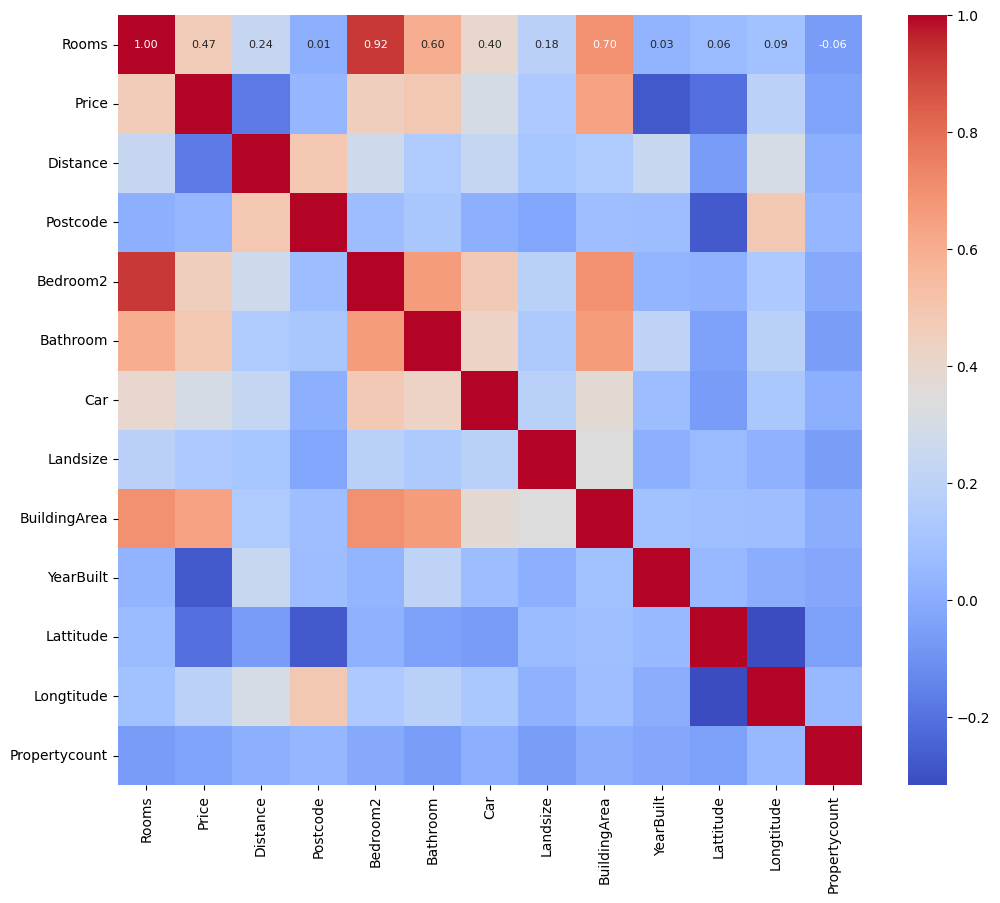

In [135]:
# Correlation for numerical features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
plt.show()

In [136]:
numeric_df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.469658,0.235313,0.013619,0.924826,0.602936,0.395596,0.184044,0.698339,0.028309,0.063285,0.089814,-0.062785
Price,0.469658,1.000000,-0.176816,0.046844,0.453279,0.485765,0.303079,0.132976,0.642260,-0.280323,-0.213336,0.191248,-0.029791
Distance,0.235313,-0.176816,1.000000,0.494581,0.272977,0.145654,0.233234,0.111812,0.144503,0.240512,-0.063519,0.307106,0.014057
Postcode,0.013619,0.046844,0.494581,1.000000,0.070311,0.124863,0.013832,-0.024367,0.077863,0.071465,-0.271854,0.486390,0.047500
Bedroom2,0.924826,0.453279,0.272977,0.070311,1.000000,0.661217,0.481238,0.181194,0.698142,0.037499,0.023662,0.135811,-0.008495
Bathroom,0.602936,0.485765,0.145654,0.124863,0.661217,1.000000,0.428064,0.138922,0.663043,0.206150,-0.040535,0.180647,-0.057149
Car,0.395596,0.303079,0.233234,0.013832,0.481238,0.428064,1.000000,0.181274,0.377207,0.073915,-0.064283,0.129759,0.009599
Landsize,0.184044,0.132976,0.111812,-0.024367,0.181194,0.138922,0.181274,1.000000,0.342045,0.014765,0.058924,0.023574,-0.057122
BuildingArea,0.698339,0.642260,0.144503,0.077863,0.698142,0.663043,0.377207,0.342045,1.000000,0.091618,0.082566,0.077687,0.007298
YearBuilt,0.028309,-0.280323,0.240512,0.071465,0.037499,0.206150,0.073915,0.014765,0.091618,1.000000,0.056300,0.004132,-0.022527


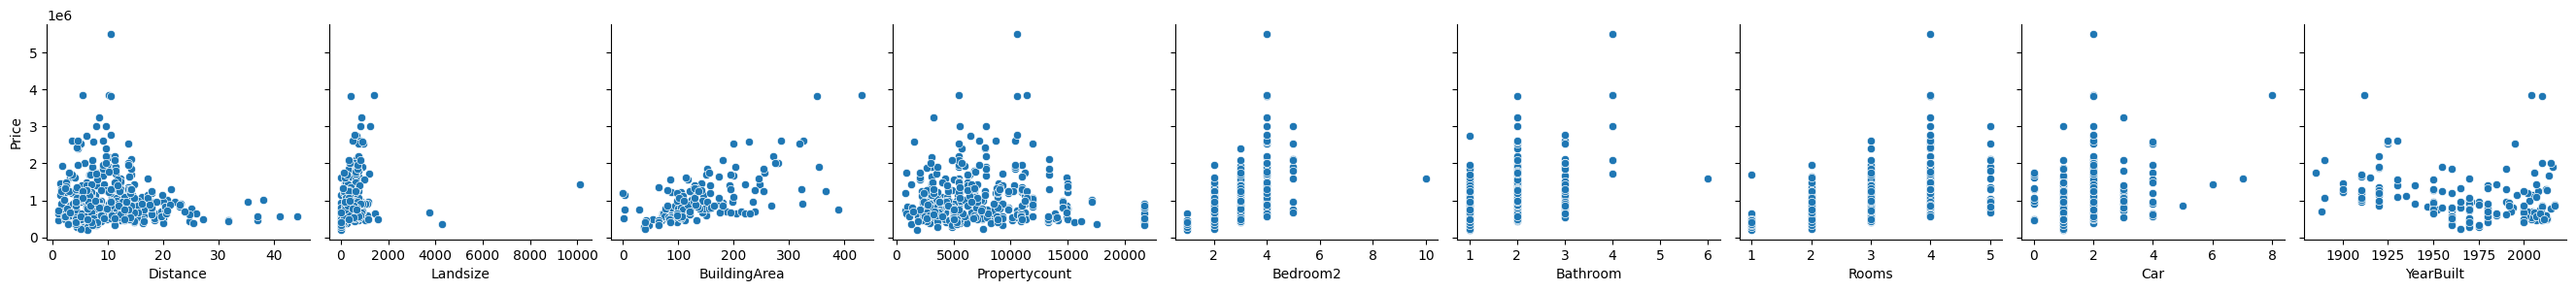

In [137]:
# Scatter plots for numerical columns
sns.pairplot(df, x_vars=['Distance', 'Landsize','BuildingArea','Propertycount','Bedroom2','Bathroom','Rooms','Car','YearBuilt'], 
             y_vars='Price', height=3, aspect=1, kind='scatter')
plt.show()

### EDA Insights

- After excluding unnamed columns, dataset has 21 attributes. 8 object columns and 13 numeric columns.

- 9 numeric columns consist of NAs, 'BuildingArea' and 'YearBuilt' have over 50% NAs, with others hovering around 20-35%.

- Most of the features shows right-skewed distribution, possibly due to the natural minimum bound of these features (Price, Rooms, Car, Landize, BuildingArea, Bathroom, Propertycount....).

- Box-Plot and outlier count further indicates the skewness, with Car and Price showing the most outliers.

- Correlations are seen between 'Rooms', 'Bedroom2', 'Bathroom', 'BuildingArea' and 'Price'. Seems logical since Rooms and Bedroom are supposed to be the same attribute from different sources, and bathroom counts should be naturally positive correlated to room counts, which are standard in house designs. These features would be positive correlated to building area and hence correlated to price.

- Landsize actually shows good correlation with price if we disregard the few outliers.

- Further analysis needed after we deal with missing values.

- Majority of the Type is : h ; Method : S

### **2. Linear Regression Model Development** (15 pts):
- Develop a Linear regression model to predict price of house in Melbourne.

- Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).

- Explain the steps you took in preparing the data and developing the model.

- You might need to encode the values for your prediction.

In [138]:
# Show the columns which have NAs
na_sum

,NA_Count,NA_Percentage,Type,Median,Mean
Price,108,22.0,float64,870500.000,1037079.668
Bedroom2,128,26.0,float64,3.000,3.084
Bathroom,128,26.0,float64,1.000,1.650
Car,137,27.0,float64,2.000,1.738
Landsize,174,35.0,float64,535.000,533.400
BuildingArea,310,62.0,float64,130.000,152.462
YearBuilt,287,58.0,float64,1970.000,1968.118
Lattitude,122,24.0,float64,-37.802,-37.805
Longtitude,122,24.0,float64,144.998,144.998


In [139]:
# Dropping unnecessary features
columns_drop = ['Address','Bedroom2','Longtitude','Lattitude','YearBuilt','Suburb','Postcode','CouncilArea']
df_reduced = df.drop(columns = columns_drop)

In [140]:
# Check for NAs in the reduced data
print(df_reduced.isnull().sum())
print(df_reduced.dtypes)

Rooms              0
Type               0
Price            108
Method             0
SellerG            0
Date               0
Distance           0
Bathroom         128
Car              137
Landsize         174
BuildingArea     310
Regionname         0
Propertycount      0
dtype: int64
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
Regionname        object
Propertycount      int64
dtype: object


In [141]:
# Handling the Date column
df_reduced['Date'] = pd.to_datetime(df['Date'],format='mixed', dayfirst=True)
df_reduced['Year'] = df_reduced['Date'].dt.year
df_reduced['Quarter'] = df_reduced['Date'].dt.quarter
df_reduced = df_reduced.drop('Date',axis = 1)

In [142]:
# Encoding categorical features
df_reduced = pd.concat([df_reduced,pd.get_dummies(df_reduced['Year'], prefix='Year'),pd.get_dummies(df_reduced['Quarter'], prefix='Qtr'),pd.get_dummies(df_reduced['Method'], prefix='Method'),pd.get_dummies(df_reduced['Type'],prefix='Type'),pd.get_dummies(df_reduced['SellerG'],prefix='Agent'),pd.get_dummies(df_reduced['Regionname'],prefix='Region')], axis=1)

In [143]:
# Drop the original categorical column and one of each dummies
df_reduced.drop(['Year','Quarter','Method','Type','SellerG','Regionname','Year_2016','Qtr_1','Method_PI','Type_h','Agent_@Realty','Region_Eastern Metropolitan'], axis = 1, inplace = True)
na_check = df_reduced.isnull().sum()

In [144]:
# Imput missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
df_numeric = df_reduced.iloc[:,0:8]
df_dummies = df_reduced.iloc[:,8:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)


In [145]:
# Use KNN predictive imputation to deal with missing values
imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(scaled_features)

imputed_df = pd.DataFrame(imputed_data, columns=df_numeric.columns)

original_scale = scaler.inverse_transform(imputed_df)

df_clean = pd.DataFrame(original_scale, columns=df_numeric.columns)

df_clean = pd.concat([df_clean, df_dummies], axis = 1)

for col in ['Bathroom','Car','BuildingArea','Propertycount','Landsize']:
    df_clean[col] = df_clean[col].round()

In [146]:
# Check the imputed df

print(df_clean.dtypes)
print(df_clean.isnull().sum())

Rooms                                float64
Price                                float64
Distance                             float64
Bathroom                             float64
Car                                  float64
                                      ...   
Region_Northern Victoria                bool
Region_South-Eastern Metropolitan       bool
Region_Southern Metropolitan            bool
Region_Western Metropolitan             bool
Region_Western Victoria                 bool
Length: 119, dtype: object
Rooms                                0
Price                                0
Distance                             0
Bathroom                             0
Car                                  0
                                    ..
Region_Northern Victoria             0
Region_South-Eastern Metropolitan    0
Region_Southern Metropolitan         0
Region_Western Metropolitan          0
Region_Western Victoria              0
Length: 119, dtype: int64


In [147]:
# Prepare train-test data for model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train,test=train_test_split(df_clean, train_size=0.8, random_state=100)
X_lin_train = train.drop('Price',axis=1)
y_lin_train = train['Price']
model = LinearRegression()
model.fit(X_lin_train, y_lin_train)


LinearRegression()

In [148]:
# Prediction
y_lin_pred_IS = model.predict(X_lin_train)
y_lin_pred_OOS = model.predict(test.drop('Price',axis=1))

### Insights

From the EDA part, we identified some issues we need to handle before we can fit our linear model

- There are quite alot categorical variables regarding location, I chose one to leave in the model and dropped the other location related features, to simplify the model and minimize the amount of dummy variables we have in the model.

- Some of the features are repetetive, like Bedroom2 and Rooms, so I kept the one with no NA values and dropped the other.

- Transforned Date data into Year and Quarter dummies for better interpretation.

- 'YearBuilt' had over 50% of missing value, and from EDA it does not seem to have a significant effect on price.

- We identified that there are a few features with high percentage of NA values, I used KNN predictive imputation using numeric features to impute missing values, and rounded the results up to the digit it was in the original dataset.

- Rest of the categorical features were encoded using one-hot encoding, and one level of each categorical data were dropped to prevent perfect multicollinearity.

- Linear Regression model was built on the cleaned data, with 118 (predictors + dummies) and price as y

### **3. Model Evaluation** (20 pts):
- Evaluate your linear regression model using appropriate metrics.

- Split the dataset into training and testing sets to perform this evaluation.

- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [149]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_IS = mean_squared_error(train['Price'], y_lin_pred_IS)
rmse_IS = mse_IS ** 0.5
r2_IS = r2_score(train['Price'], y_lin_pred_IS)

mse_OOS = mean_squared_error(test['Price'], y_lin_pred_OOS)
rmse_OOS = mse_OOS ** 0.5
r2_OOS = r2_score(test['Price'], y_lin_pred_OOS)


print(f"IS RMSE: {rmse_IS}")
print(f"IS RSquared: {r2_IS}")
print(f"OOS RMSE: {rmse_OOS}")
print(f"OOS RSquared: {r2_OOS}")

IS RMSE: 344869.64866362466
IS RSquared: 0.702073517193026
OOS RMSE: 449328.3222196847
OOS RSquared: 0.38294568009060004


### Insights

- Analyzing the in-sample and out-of-sample metrics, we can see that RMSE is 100 thousand larger for OOS compared to IS.

- RSquared almost halved for OOS.

- This shows that this model may not be great at predicting out of sample data, which implies this may not be a good model to use for prediction.

### **4. Regularization** (25 pts):
- Is there a need for Lasso regularization? Explain. (Compare test and training results)

- Set up a Lasso regression model with specified parameters and fit it to the training data.

- Perform Lasso regression on both training and test data

- Analyze and explain how the results change from previous answer.

In [150]:
# Import packages for Lasso and standardize data
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
X_train_scaled = scaler.fit_transform(X_lin_train)
X_test_scaled = scaler.transform(test.drop('Price',axis=1))

In [151]:
# Set up the Lasso Regression, set alpha as 1000 initially
lasso = Lasso(alpha=1000)
lasso.fit(X_train_scaled, y_lin_train)

Lasso(alpha=1000)

In [152]:
# View coefficients
print("Lasso coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Lasso coefficients: [ 0.00000000e+00 -2.69287111e+05  1.11925489e+05  5.34752868e+04
  1.88827206e+04  2.46754122e+05  1.76444268e+04 -2.00823873e+04
  4.65613688e+04 -9.75630757e+03  3.55802890e+03  7.78065328e+03
 -5.72036268e+02  2.83440023e+04  1.37414678e+04  3.90834670e+04
  6.71742587e+03 -5.25973682e+04 -1.89784072e+04 -4.01458310e+03
 -5.86732204e+04 -1.57138983e+05 -1.66967731e+04  1.03925192e+04
 -3.62984327e+04  0.00000000e+00  0.00000000e+00  9.42392678e+03
 -5.42694865e+03 -1.99433597e+04 -4.54545373e+03 -6.41486898e+03
  4.57494951e+04  4.94568714e+03 -3.13302383e+04 -2.06317500e+04
 -1.17147056e+04 -8.43407700e+03  0.00000000e+00 -1.70325942e+04
  0.00000000e+00 -2.14724786e+04 -2.34853383e+03  0.00000000e+00
 -1.33011941e+04 -3.56556848e+03  6.07054034e+03  5.01553964e+01
  1.28748410e+04  4.84447634e+03 -1.39087797e+04 -8.22463940e+03
  7.38706707e+03 -7.44281578e+03  1.91328063e+04  4.86371920e+03
  0.00000000e+00  3.39932162e+04 -5.55989810e+03 -2.18389683e+04
  1.2

In [153]:
# Perform lasso for both train and test
y_pred_lasso_IS = lasso.predict(X_train_scaled)
y_pred_lasso_OOS = lasso.predict(X_test_scaled)

In [154]:
# Metrics for IS and OOS
mse_IS_lasso = mean_squared_error(train['Price'], y_pred_lasso_IS)
rmse_IS_lasso = mse_IS_lasso ** 0.5
r2_IS_lasso = r2_score(train['Price'], y_pred_lasso_IS)

mse_OOS_lasso = mean_squared_error(test['Price'], y_pred_lasso_OOS)
rmse_OOS_lasso = mse_OOS_lasso ** 0.5
r2_OOS_lasso = r2_score(test['Price'], y_pred_lasso_OOS)


print(f"Lasso IS RMSE: {rmse_IS_lasso}")
print(f"Lasso IS RSquared: {r2_IS_lasso}")
print(f"Lasso OOS RMSE: {rmse_OOS_lasso}")
print(f"Lasso OOS RSquared: {r2_OOS_lasso}")

Lasso IS RMSE: 345821.10233986896
Lasso IS RSquared: 0.7004273632398688
Lasso OOS RMSE: 398712.2394135857
Lasso OOS RSquared: 0.5141357507282175


### Insights

- From the previous linear regression results, we can see that both RMSE and Rsquared differ quite a bit for training and testing data.

- This could imply overfitting of the original linear model, so running Lasso for feature selection does seem like a good idea to build a better model at prediting.

- I arbitrarily chose to set alpha at 1000, since the original model has 118 predictors, it would be good to start at a strict alpha level to see how effective Lasso is at feature selection, and how metrics differ.

- The lasso model had a significant improvement on OOS prediction compared to the orignial linear model.

- RMSE difference for OOS & IS of the Lasso model now is hovering around 50K.

- OOS RSquared now is around 51%, which is a significant improvement of the original 38%.

- Overall OOS performance is better than the linear model.

### **5. Out-of-sample performance** (25 pts):
- Ignore all previously trained models.

- Split the data into a new training and test 80-20.

- Newly train (fit) the linear regression model on the training data.

- Newly train (fit) the lasso regression model on the training data.

- Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

- Estimate the models true OOS performance by computing their deviance on the test data.

- Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.

In [155]:
# Split the data
X = df_clean.drop('Price', axis = 1)
y = df_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [156]:
# Linear Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [157]:
# Lasso Model, us LassoCV to choose optimal lambda
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LassoCV
alphas = np.logspace(-6, 1, 100)
lasso_cv = LassoCV(alphas=alphas, max_iter=100000, cv=5, random_state=100)
lasso_cv.fit(X_train_scaled, y_train)
print(f"Best alpha: {lasso_cv.alpha_}")

Best alpha: 10.0


In [158]:
# Information Criteria Calculation

def ic(model, X, y, is_lasso = False):
    n = len(y)
    if is_lasso:
        k = np.sum(model.coef_ != 0) +1
    else:
        k = model.coef_.shape[0] + 1
    
    rss = mean_squared_error(y, model.predict(X))*n
    aic = n*np.log(rss/n)+2*k
    bic = n*np.log(rss/n)+np.log(n)*k
    aicc = aic+(2*k*(k+1))/(n-k-1)
    return aic, bic, aicc

aic_linear, bic_linear, aicc_linear = ic(linear_model,X_train,y_train)

aic_lasso, bic_lasso, aicc_lasso = ic(lasso_cv,X_train_scaled,y_train, is_lasso = True)

In [159]:
# 5 fold CV
from sklearn.model_selection import cross_val_score
cv_score_ln = -cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
cv_score_las = -cross_val_score(lasso_cv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()
# deviance_cv_ln = 2*cv_score_ln*(len(y_train)/5)
# deviance_cv_las = 2*cv_score_las*(len(y_train)/5)

rmse_cv_ln = np.sqrt(cv_score_ln)
rmse_cv_las = np.sqrt(cv_score_las)

In [160]:
# True OOS performance
# deviance_linear_oos = 2*np.sum((y_test - linear_model.predict(X_test))**2)
# deviance_lasso_oos = 2*np.sum((y_test - lasso_cv.predict(X_test_scaled))**2)

mse_linear_oos = mean_squared_error(y_test, linear_model.predict(X_test))
mse_lasso_oos = mean_squared_error(y_test, lasso_cv.predict(X_test_scaled))

rmse_linear_oos = np.sqrt(mse_linear_oos)
rmse_lasso_oos = np.sqrt(mse_lasso_oos)

In [161]:

# def calculate_deviance(y_true, y_pred, n):
#     # Calculate RSS
#     rss = np.sum((y_true - y_pred) ** 2)
    
#     # Estimate error variance
#     sigma_squared_hat = rss / n
    
#     # Compute log-likelihood
#     log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(sigma_squared_hat) - rss / (2 * sigma_squared_hat)
#     deviance = -2*log_likelihood
#     return deviance

In [162]:
# from sklearn.metrics import make_scorer

# def log_likelihood_scorer(y_true, y_pred):
#     # Calculate residuals
#     residuals = y_true - y_pred
    
#     # Estimate the variance of residuals
#     sigma_squared_hat = np.mean(residuals**2)
    
#     # Number of observations
#     n = len(y_true)
    
#     # Compute the log-likelihood assuming normally distributed errors
#     log_likelihood = -n/2 * np.log(2 * np.pi * sigma_squared_hat) - np.sum(residuals**2) / (2 * sigma_squared_hat)
    
#     return log_likelihood

# # Create the custom scorer from the log-likelihood function
# log_likelihood_scorer = make_scorer(log_likelihood_scorer, greater_is_better=True)


In [163]:

# print(calculate_deviance(y_test,linear_model.predict(X_test),len(y_test)))
# log_likelihood_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring=log_likelihood_scorer).mean()
# print(-2*log_likelihood_scores)

In [164]:
# Compare
metrics_df = pd.DataFrame({'Metric': ['AIC', 'BIC', 'AICc', 'CV RMSE', 'OOS RMSE'],
    'Linear Model': [aic_linear, bic_linear, aicc_linear, rmse_cv_ln, rmse_linear_oos],
    'Lasso Model': [aic_lasso, bic_lasso, aicc_lasso, rmse_cv_las, rmse_lasso_oos]
})

metrics_df

,Metric,Linear Model,Lasso Model
0,AIC,10413.235592,10391.241934
1,BIC,10887.922001,10822.049767
2,AICc,10515.601184,10472.428141
3,CV RMSE,483382.059577,481733.183610
4,OOS RMSE,449328.322220,445148.280794


### Insights

- Among the ICs,for both linear and lasso model, AIC was the lowest

- The CV RMSE and OOS RMSE was quite off compared to the in sample ICs, the closest one for both models would be BIC

- CV compared to the ICs are way more closer to the true OOS performance.

- The Lasso model shows slightly better performance on true OOS prediction.